In [2]:
import pyvista as pv
import numpy as np

## Reading Nek files

In [6]:
filename = "./data/v5/po_premix.nek5000"
reader = pv.get_reader(filename)
time_value = 16
reader.set_active_time_value(time_value)

data = reader.read()
times = np.asarray(reader.time_values)
print(times)

[ 1.     2.001  3.001  4.001  5.     6.     7.     8.     9.    10.001
 11.001 12.001 13.001 14.001 15.001 16.001 17.001]


## Plotting

In [7]:
data.plot(scalars='Temperature', cpos='xy', interactive=True)

Widget(value='<iframe src="http://localhost:49756/index.html?ui=P_0x263287ba510_0&reconnect=auto" class="pyvis…

## Filtering Data

## Extract Isolevel

In [8]:
iso = data.contour(isosurfaces= 3, scalars="Temperature")
pl = pv.Plotter()
#pl.add_mesh(data, opacity=0.85)
pl.add_mesh(iso, color='black', line_width=3)
pl.show()

Widget(value='<iframe src="http://localhost:49756/index.html?ui=P_0x2633debd590_1&reconnect=auto" class="pyvis…

(50.0, 60.0)

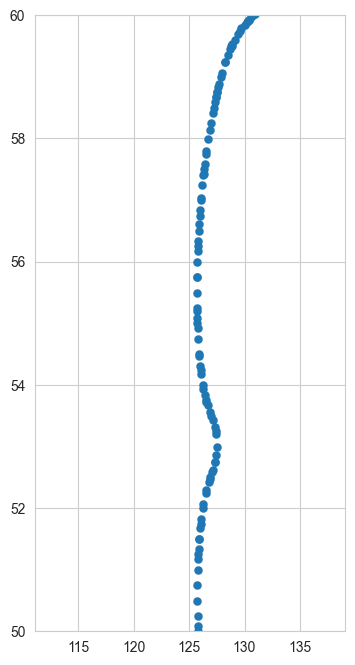

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pts = iso.points  # shape (N, 3): columns are x, y, z

df = pd.DataFrame(pts, columns=["x", "y", "z"])
df.to_csv("isocontour_points.csv", index=False)

plt.figure(figsize= (4, 8))
plt.scatter(df["x"], df["y"],linewidths=0.1 )
plt.ylim((50,60))


## Computing Equivalence Ratio